In [3]:
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import os
import random
from termcolor import colored
import matplotlib.pyplot as plt
from keras.utils import plot_model
from tensorflow.keras import models, layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import warnings
warnings.filterwarnings("ignore")
print ('modules loaded')

modules loaded


# Corn Leaf Diseases Classification

This study is cunducted on the dataset: https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset?select=data

The dataset contains: $4188$ images of corn leaves, devided into different kind of diseases:

1. Common Rust - 1306 images
2. Gray Leaf Spot - 574 images
3. Blight -1146 images
4. Healthy - 1162 images


# Summary
1. [Data Preparation](#data-preparation)
2. [Exploratory Data Analysis](#eda)
  1.
  2. Visualisations


<a name="data-preparation"></a>
## Data Preparation

Build the dataset with Images ID and labels for further analysis
import os
import zipfile

# Set up Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'karencogan'
os.environ['KAGGLE_KEY'] = 'a1ecf9a01db4b3d8a9757b38040a6033'

# Download the dataset using Kaggle API
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

# Define the directory to store the dataset
dataset_dir = 'Corn-Diseases-Project'

# Check if the directory already exists before trying to create it
if not os.path.exists(dataset_dir):
    os.mkdir(dataset_dir)
else:
    print(f"Directory '{dataset_dir}' already exists.")

# Unzip the dataset
with zipfile.ZipFile('corn-or-maize-leaf-disease-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print("Dataset downloaded and extracted successfully.")



In [5]:
def is_image_file_valid(file_path): 
    try: 
        img = Image.open(file_path) 
        img.verify()  
        return True 
    except (IOError, SyntaxError) as e: 
        print(f"Bad file: {file_path}") 
        return False 

In [7]:
import pandas as pd
import os
from tqdm import tqdm #This add a progress bar to the loop
from PIL import Image 


main_folder_path = r'C:\Users\karen\OneDrive\PredictiveAnalytics\Corn-Diseases-Project\data' 
images = [] 
labels = [] 

# Loop through the dataset and check each image 
for folder in os.listdir(main_folder_path): 
    folder_path = os.path.join(main_folder_path, folder)
    if folder != 'logs' and folder != 'images-labels.csv': 
        for image in os.listdir(folder_path): 
            image_path = os.path.join(folder_path, image) 
            if is_image_file_valid(image_path): 
                images.append(image_path) 
                labels.append(folder) # Create a DataFrame with valid images and labels 

df = pd.DataFrame(zip(images, labels), columns=['image', 'label']) 
df.to_csv(os.path.join(main_folder_path, 'images-labels.csv'), index=False)

<a name='eda'></a>
## Exploratory Data Analysis (EDA)

1. Get Dataset Metrics
2. Get Some Statistics (Mode and labels)
3. Visualisations:
  1. Labels Ditribution

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   4187 non-null   object
 1   label   4187 non-null   object
dtypes: object(2)
memory usage: 65.6+ KB


In [11]:
print(f'Type of Diseases: {df["label"].unique()}\n')
print(f'Number of samples for each Disease: {df["label"].value_counts()}')

Type of Diseases: ['Blight' 'Common_Rust' 'Gray_Leaf_Spot' 'Healthy']

Number of samples for each Disease: label
Common_Rust       1306
Healthy           1162
Blight            1145
Gray_Leaf_Spot     574
Name: count, dtype: int64


Text(0.5, 1.0, 'Lables Distribution')

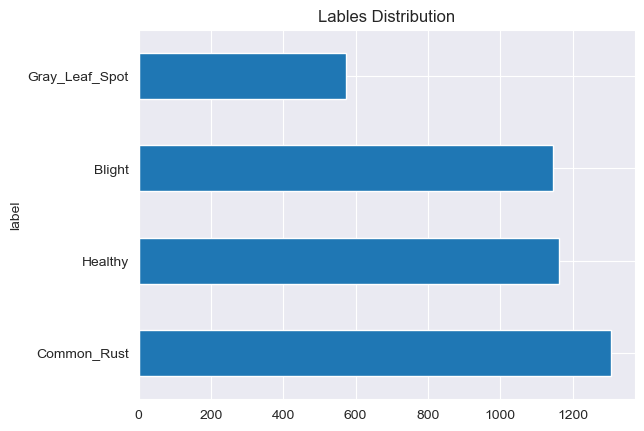

In [13]:
# Vis 1. Labels Distribution

import matplotlib.pyplot as plt
import seaborn as sns

df['label'].value_counts().plot.barh()
plt.title('Lables Distribution')

In [14]:
# Vis.2 - Sample Images for wach disease

# Define functions to resize and display images
from PIL import Image

def resize_and_display(image_path, size):
  image = Image.open(image_path)
  image_resiezed = image.resize(size)

  plt.imshow(image_resiezed)
  plt.axis('off')



In [15]:
from PIL import Image 

def is_image_file_valid(file_path): 
    try: 
        img = Image.open(file_path) 
        img.verify()  
        return True 
    except (IOError, SyntaxError) as e: 
        print(f"Bad file: {file_path}") 
        return False 
# List to store paths of valid images and labels
valid_images = [] 
valid_labels = [] 

# Loop through the dataset and check each image 
for folder in os.listdir(main_folder_path): 
    folder_path = os.path.join(main_folder_path, folder)
    if folder != 'logs' and folder != 'images-labels.csv': 
        for image in os.listdir(folder_path): 
            image_path = os.path.join(folder_path, image) 
            if is_image_file_valid(image_path): 
                valid_images.append(image_path) 
                valid_labels.append(folder) # Create a DataFrame with valid images and labels 

df = pd.DataFrame(zip(valid_images, valid_labels), columns=['image', 'label']) 
df.to_csv(os.path.join(main_folder_path, 'images-labels.csv'), index=False)

In [16]:
corrupted_file_path = r'C:\Users\karen\OneDrive\PredictiveAnalytics\Corn-Diseases-Project\data\Blight\Corn_Blight (87).jpg' 
# Check if the file exists 
if os.path.exists(corrupted_file_path): 
    os.remove(corrupted_file_path) 
    print(f"Removed corrupted file: {corrupted_file_path}") 
else: 
    print(f"File not found: {corrupted_file_path}")

File not found: C:\Users\karen\OneDrive\PredictiveAnalytics\Corn-Diseases-Project\data\Blight\Corn_Blight (87).jpg


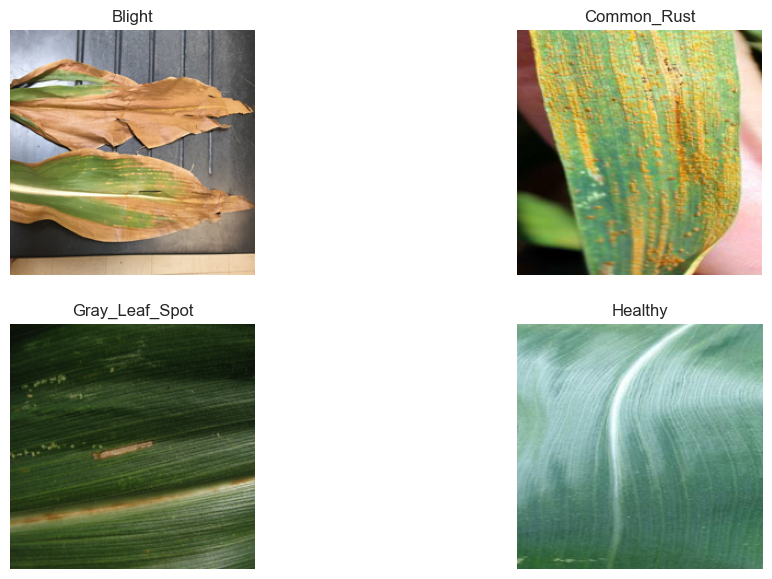

In [17]:
import matplotlib.image as mpimg
import numpy as np

labels = df['label'].unique()

plt.figure(figsize = (12, 7))


for i, dis in enumerate(labels):

  image_path = df[df['label'] == dis]['image'].values[0]
  ax = plt.subplot(2, 2, i+1)
  resize_and_display(image_path, (224, 224))
  plt.title(f"{dis}")
  plt.axis('off')


plt.show()

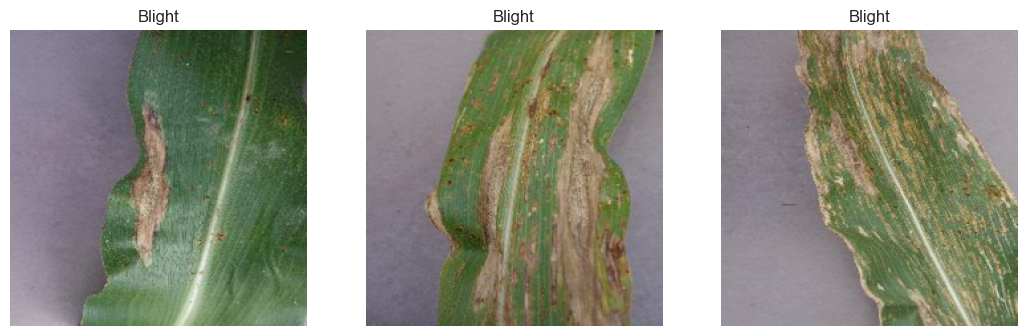

In [18]:
# Comparison Bewtween various desiased leaf

dis = 'Blight'

df_blight = df[df['label'] == dis]
plt.figure(figsize = (13, 13))

i = 0
for path in df_blight['image'].sample(n = 3, random_state = 42):
  ax = plt.subplot(1, 3, i+1)
  resize_and_display(path, (224,224))
  plt.title(dis)
  i += 1


plt.show()




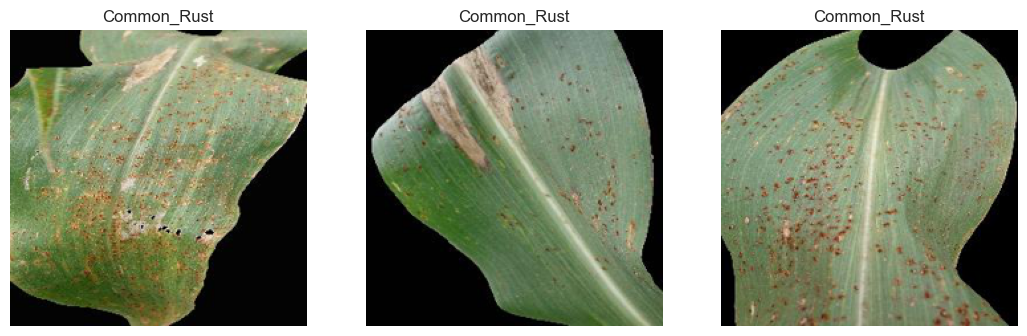

In [19]:
dis = 'Common_Rust'

df_blight = df[df['label'] == dis]
plt.figure(figsize = (13, 13))

i = 0
for path in df_blight['image'].sample(n = 3, random_state = 42):
  ax = plt.subplot(1, 3, i+1)
  resize_and_display(path, (224,224))
  plt.title(dis)
  i += 1


plt.show()

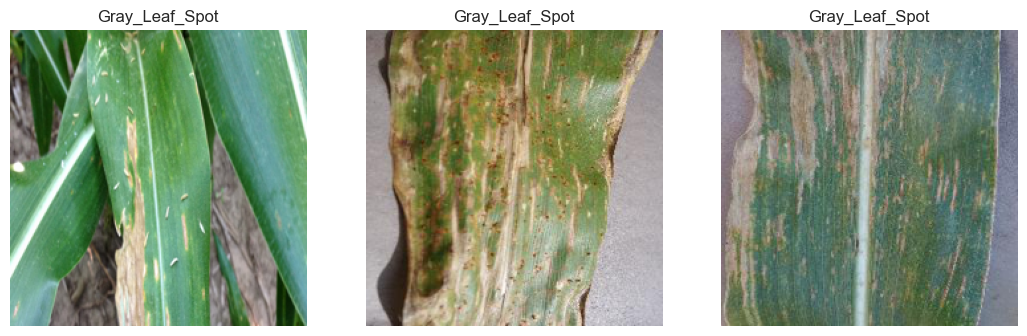

In [20]:
dis = 'Gray_Leaf_Spot'

df_blight = df[df['label'] == dis]
plt.figure(figsize = (13, 13))

i = 0
for path in df_blight['image'].sample(n = 3, random_state = 42):
  ax = plt.subplot(1, 3, i+1)
  resize_and_display(path, (224,224))
  plt.title(dis)
  i += 1


plt.show()

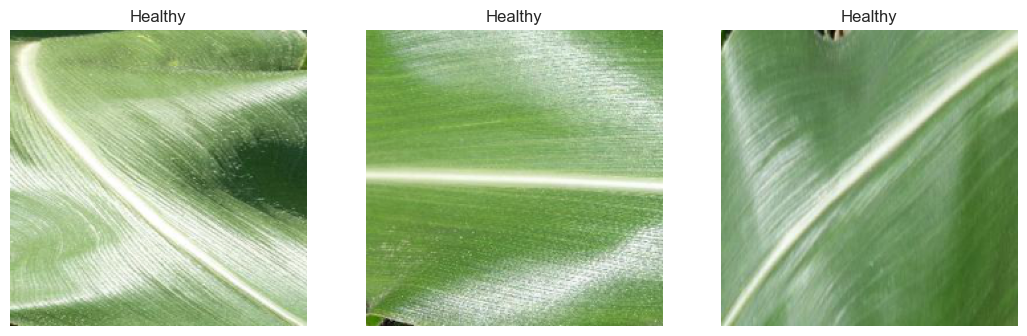

In [21]:
dis = 'Healthy'

df_blight = df[df['label'] == dis]
plt.figure(figsize = (13, 13))

i = 0
for path in df_blight['image'].sample(n = 3, random_state = 42):
  ax = plt.subplot(1, 3, i+1)
  resize_and_display(path, (224,224))
  plt.title(dis)
  i += 1


plt.show()

In [22]:
strat = df['label']
train_df, test_df = train_test_split(df,  train_size= 0.95, shuffle= True, random_state= 123, stratify= strat)

In [23]:
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (3977, 2)
Test set shape: (210, 2)


In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Scaled images in range 0 to 1
    rotation_range=20,              # Rorate images by factor 20 degree
    width_shift_range=0.2,          # Shift images horizontally by up to 20% of their width
    height_shift_range=0.2,         # Shift images vertically by up to 20% of their width
    zoom_range=0.1,                 # Zoom in and out images by 10%
    horizontal_flip=True,           # Allow horizontal flipping
    shear_range=0.1,                # shear images by 10% their size
    fill_mode='nearest',            # fill unlocated pixels by nearest pixel
    validation_split=0.2
    )

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,             # Target data
    x_col='image',              # X column
    y_col='label',                  # y column
    target_size=(224, 224),         # Resize images  to
    color_mode='rgb',               # Color mode
    class_mode='categorical',       # type of model
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'

)

Found 3182 validated image filenames belonging to 4 classes.


In [25]:

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    seed=42,
    shuffle=False,
    subset='validation'
)

Found 795 validated image filenames belonging to 4 classes.


In [26]:
test_datagen = ImageDataGenerator(rescale=1./255,)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    seed=42,
    shuffle=False,
)

Found 210 validated image filenames belonging to 4 classes.


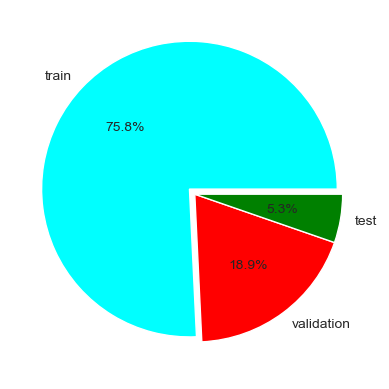

<Figure size 640x480 with 0 Axes>

In [27]:
plt.pie([len(train_generator ), len(validation_generator), len(test_generator)],
        labels=['train', 'validation', 'test'], autopct='%.1f%%', colors=['aqua', 'red', 'green'], explode=(0.05, 0, 0))
plt.show()
plt.savefig('dataset_pie.png')

In [28]:
print(train_generator.class_indices)
print(test_generator.class_indices)
print(validation_generator.class_indices)

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}


In [29]:
pre_trained_model = MobileNetV2(
    input_shape=(224, 224, 3),            # Input image size
    include_top=False,                    # model not include top layer
    weights='imagenet',                   # weights type
    pooling='avg'                         # type of pooling layer
)

In [30]:
# Name of layers in MobileNetV2
for layer in pre_trained_model.layers :
    print(layer.name)

input_layer
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6_ex

#  Another option is to freeze all layers but the last. The code would be as below

pre_trained_model.trainable = True
set_trainable = False

for layer in pre_trained_model.layers :
    if layer.name == 'block_16_expand' :
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False

In [32]:
# Freeze all layers of the pre-trained model
for layer in pre_trained_model.layers:
    layer.trainable = False

In [33]:
# Add custom layers on top of the base model
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax'))
model.build(input_shape=(None, 224, 224, 3))

In [34]:
plot_model(model, show_shapes=True, show_layer_names=False, dpi=200)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [35]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [36]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [37]:
checkpoint_cb = ModelCheckpoint('MyModel.keras', save_best_only=True)
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [38]:
import math
validation_steps = math.ceil(len(validation_generator.filepaths) / validation_generator.batch_size)

In [39]:
print(validation_steps)
print(len(validation_generator.filepaths))
print(validation_generator.batch_size)

25
795
32


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=math.ceil(len(train_generator.filepaths) / train_generator.batch_size),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr]  # Add your callbacks here if you have them
)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6937 - loss: 0.8168 - val_accuracy: 0.8918 - val_loss: 0.3275 - learning_rate: 0.0010
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8859 - loss: 0.2925 - val_accuracy: 0.9082 - val_loss: 0.2619 - learning_rate: 0.0010
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9040 - loss: 0.2489 - val_accuracy: 0.9006 - val_loss: 0.2512 - learning_rate: 0.0010
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9094 - loss: 0.2349 - val_accuracy: 0.8956 - val_loss: 0.2645 - learning_rate: 0.0010
Epoch 8/100
100/100 ━━━━━

In [ ]:
# Convert resutl of training to a DataFrame
result_df = pd.DataFrame(history.history)
result_df.tail()

In [ ]:
x = np.arange(len(result_df))
fig, ax = plt.subplots(3, 1, figsize=(15, 12))
#  AX0 : Loss
ax[0].plot(x, result_df.loss, label='loss', linewidth=3)
ax[0].plot(x, result_df.val_loss, label='val_loss', linewidth=2, ls='-.', c='r')
ax[0].set_title('Loss', fontsize=20)
ax[0].legend()

#  AX1 : Loss
ax[1].plot(x, result_df.accuracy, label='accuracy', linewidth=2)
ax[1].plot(x, result_df.val_accuracy, label='val_accuracy', linewidth=2, ls='-.', c='r')
ax[1].set_title('Accuracy', fontsize=20)
ax[1].legend()

#  AX2 : Loss
ax[2].plot(x, result_df.lr, label='learning_rate', linewidth=2)
ax[2].set_title('learning_rate', fontsize=20)
ax[2].set_xlabel('epochs')
ax[2].legend()


plt.sharex=True


plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/Corn-Diseases-Project/MobileNetAccuracy.png')

In [ ]:
model.save("name.h5")